# Alexander Tyan - Assignment 4

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def annual_income_simulation(param_dict):
    mu = param_dict['mu']  # Mean
    sigma = param_dict['sigma']  # Standard deviation
    rho = param_dict['rho']  # Persistence
    g = param_dict['g']  # Long-run growth rate of income
    inc_0 = param_dict['inc_0']  # Average starting income
    t_start = param_dict['t_start']  # Start-year of work
    t_end = param_dict['t_end']  # End-year of work
    num_draws = param_dict['num_draws']  # Number of draws

    # Years to work; (t_end + 1) to include last year.
    years_to_work = (t_end + 1) - t_start

    # Set random seed:
    np.random.seed(524)

    # Generate num_draws error draws from the normal distribution:
    errors = np.random.normal(mu, sigma, (years_to_work, num_draws))

    # Create a placeholder matrix. Each row - a single year of work.
    # Each column, result of each simulation for that year.:
    ln_lifetime_income_matrix = np.zeros((years_to_work, num_draws))

    # Natural log of the annual income in start year (2019),
    # fill the 0th row :
    ln_lifetime_income_matrix[0, :] = np.log(inc_0) + errors[0, :]

    # Fill the rows 1 to 39:
    for year in range(1, years_to_work):
        ln_lifetime_income_matrix[year, :] = (1 - rho) * \
                                 (np.log(inc_0) + g * year) + \
                                 rho * (ln_lifetime_income_matrix[year - 1, :]) + \
                                 errors[year, :]

    # Bring back normal dollars:
    return np.exp(ln_lifetime_income_matrix)

## Task 1:

### Simulate 10,000 different realizations of your lifetime income:

In [53]:
param_dict = {'mu': 0,
              'sigma': 0.1,
              'rho': 0.2,
              'g': 0.03,
              'inc_0': 80000,
              't_start': 2019,
              't_end': 2058,
              'num_draws': 10000}

In [54]:
results = annual_income_simulation(param_dict=param_dict)

### Plot one of the lifetime income paths:

Text(0,0.5,'Annual Income (\\$s)')

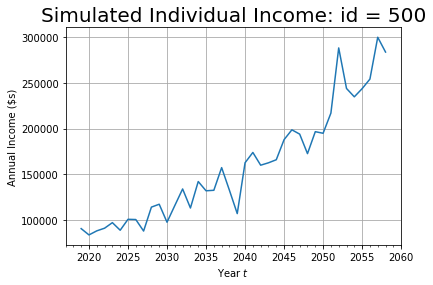

In [55]:
%matplotlib inline
years_to_work = (param_dict['t_end'] + 1) - param_dict['t_start']
year_vec = np.arange(param_dict['t_start'], param_dict['t_start'] +
                     years_to_work)
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, results[:, individual])
minorLocator = plt.MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Simulated Individual Income: id = 500', fontsize=20)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$s)')

## Task 2:

### Plot a histogram with 50 bins of year t = 2019 initial income for each of the 10,000 simulations:

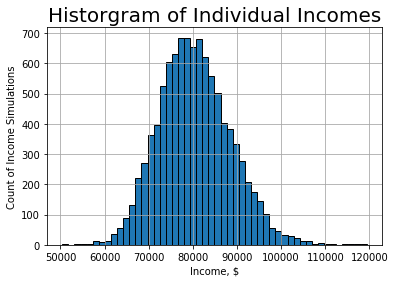

In [56]:
%matplotlib inline
x = results[0]

plt.title('Historgram of Individual Incomes', fontsize=20)
plt.xlabel('Income, $')
plt.ylabel('Count of Income Simulations')
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plot = plt.hist(x, bins=50, edgecolor='black', linewidth=1)

### Is the distribution normally distributed (i.e. symmetric and bell-curved)?

#### Yes, approximately symmetric and bell-curved, i.e. normal.

### What percent of your class will earn more than 100,000 in the first year out of the program? What percent of the class will earn less than 70,000?:

In [57]:
more_than_100k = []
less_than_70k = []
for income in results[0]:
    if income > 100000:
        more_than_100k.append(income)
    if income < 70000:
        less_than_70k.append(income)
proportion_over_100k = len(more_than_100k)/len(results[0])
proportion_under_100k = len(less_than_70k)/len(results[0])

print("Percent with more than $100,000 in the first year:", proportion_over_100k * 100, "%")
print("Percent with less than $70,000 in the first year:", proportion_under_100k * 100, "%")

Percent with more than $100,000 in the first year: 1.27 %
Percent with less than $70,000 in the first year: 9.02 %


#### Percent with more than 100,000 USD in the first year: 1.27 %
#### Percent with less than 70,000 USD in the first year: 9.02 %

## Task 3

In [58]:
debt = 95000
percent_income_debt_service = 10
proportion_income_debt_service = percent_income_debt_service / 100

list_all_debt_years = []
for simulation_index in range(param_dict['num_draws']):
    debt_left_to_pay = debt
    number_years_pay_debt = 0
    for annual_income in results[:, simulation_index]:
        pay_this_year = annual_income * proportion_income_debt_service
        debt_left_to_pay = debt_left_to_pay - pay_this_year
        number_years_pay_debt += 1
        if debt_left_to_pay <= 0:
            list_all_debt_years.append(number_years_pay_debt)
            break
#list_all_debt_years

### In what percent of the simulations are you able to pay off the  loan in 10 years (on or before t = 2028)?:

In [60]:
threshold_years = 10
list_years_satisfy_threshold = []
for value in list_all_debt_years:
    if value <= threshold_years:
        list_years_satisfy_threshold.append(value)
proportion_paying_off_well = len(list_years_satisfy_threshold)/len(list_all_debt_years)
percent_paying_off_well = proportion_paying_off_well * 100
print("Percent of the simulations that pay off the loan in 10 years:",
      percent_paying_off_well, "%")

Percent of the simulations that pay off the loan in 10 years: 18.47 %


#### Percent of the simulations that pay off the loan in 10 years: 18.47 %

### Plot the histogram of how many years it takes to pay off the loan in each of your 10,000 simulations:

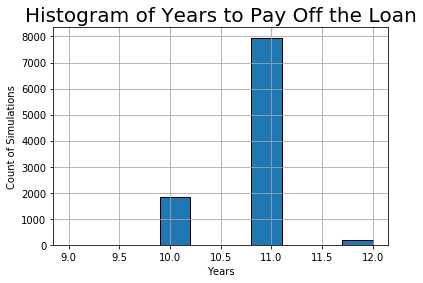

In [61]:
%matplotlib inline
x = list_all_debt_years

plt.title('Histogram of Years to Pay Off the Loan', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count of Simulations')
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plot = plt.hist(x, edgecolor='black', linewidth=1)

## Task 4

In [62]:
param_dict_2 = {'mu': 0,
              'sigma': 0.15,
              'rho': 0.2,
              'g': 0.03,
              'inc_0': 85000,
              't_start': 2019,
              't_end': 2058,
              'num_draws': 10000}

In [63]:
results_2 = annual_income_simulation(param_dict=param_dict_2)

In [64]:
debt = 95000
percent_income_debt_service = 10
proportion_income_debt_service = percent_income_debt_service / 100

list_all_debt_years_2 = []
for simulation_index in range(param_dict_2['num_draws']):
    debt_left_to_pay = debt
    number_years_pay_debt = 0
    for annual_income in results_2[:, simulation_index]:
        pay_this_year = annual_income * proportion_income_debt_service
        debt_left_to_pay = debt_left_to_pay - pay_this_year
        number_years_pay_debt += 1
        if debt_left_to_pay <= 0:
            list_all_debt_years_2.append(number_years_pay_debt)
            break
#list_all_debt_years_2

### In what percent of the simulations are you able to pay off the loan in 10 years (on or before t = 2028)?:


In [65]:
threshold_years = 10
list_years_satisfy_threshold_2 = []
for value in list_all_debt_years_2:
    if value <= threshold_years:
        list_years_satisfy_threshold_2.append(value)
proportion_paying_off_well = len(list_years_satisfy_threshold_2)/len(list_all_debt_years_2)
percent_paying_off_well = proportion_paying_off_well * 100
print("Percent of the simulations that pay off the loan in 10 years:",
      percent_paying_off_well, "%")

Percent of the simulations that pay off the loan in 10 years: 70.19999999999999 %


#### Percent of the simulations that pay off the loan in 10 years: 70.19999999999999 %

### Plot the new histogram of how many years it takes to pay off your loan of 95,000 USD in your new 10,000 simulations with the new standard deviation and the new average initial salary:

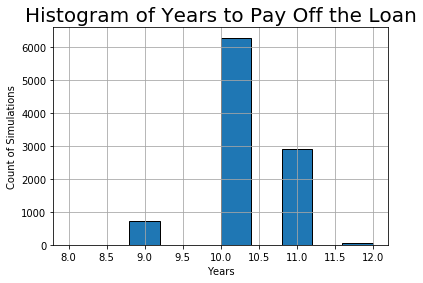

In [67]:
%matplotlib inline
x_2 = list_all_debt_years_2

plt.title('Histogram of Years to Pay Off the Loan', fontsize=20)
plt.xlabel('Years')
plt.ylabel('Count of Simulations')
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plot = plt.hist(x_2, edgecolor='black', linewidth=1)